### ML for Flask

In [17]:
import pickle
import pandas as pd
import numpy as np
xgb_model_min_loaded = pickle.load(open('ny_min_xgb_model_min.pickle', "rb"))
xgb_model_max_loaded = pickle.load(open('ny_max_xgb_model_min.pickle', "rb"))


sel_features = ['rating','.Net', 'AI', 'AWS', 'Azure', 'Big Data', 'Business Intelligence',
                'C/C++', 'Data Analysis', 'Data Science', 'Data Warehouse', 'Excel',
                'Git', 'HBase', 'Hadoop', 'Hive', 'Java', 'JavaScript', 'Kafka',
                'Linux', 'MATLAB', 'Machine Learning', 'Microsoft Office',
                'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Natural Language Processing',
                'NoSQL', 'Oracle', 'Perl', 'Pig', 'PostgreSQL', 'Project Management',
                'Python', 'R', 'S3', 'SAS', 'SPSS', 'SQL', 'Scala', 'Scripting',
                'Shell Scripting', 'Software Development', 'Spark', 'Tableau', 'TensorFlow']

def nyc_salary_with_skills(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = (int(xgb_model_min_loaded.predict(input_X[:1])), int(xgb_model_max_loaded.predict(input_X[:1])))
    return salary

In [18]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['salary'] = nyc_salary_with_skills(3.6, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill = pd.DataFrame(skill_money_list).sort_values('salary', ascending=False)

In [19]:
def nyc_salary_with_skills_and(rating, inputs_list):

    sample_list = [0] * (len(sel_features))
    input_x = pd.DataFrame([sample_list],
                           columns=list(sel_features))

    for inputs in inputs_list:
        if inputs in list(input_x.columns):
            input_x[inputs] = 1
    input_x['rating'] = float(rating)
    salary_min = int(xgb_model_min_loaded.predict(input_x))
    salary_max = int(xgb_model_max_loaded.predict(input_x))

    # suggest skill with more salary
    suggest_list = []
    all_list = inputs_list

    for skill in single_skill['skill'][:10]:
        if skill not in inputs_list:
            suggest_list.append(skill)

        suggest_list_salary = {}
        suggest_list_salary_list = []
        for skill in suggest_list:
            all_list = []
            all_list = inputs_list + [skill]
            suggest_list_salary['skill'] = skill
            suggest_list_salary['salary'] = int(np.subtract(nyc_salary_with_skills(rating, all_list),
                                                            nyc_salary_with_skills(rating, inputs_list)).mean())
            suggest_list_salary_list.append(suggest_list_salary)
            suggest_list_salary = {}
    suggest_skills = pd.DataFrame(suggest_list_salary_list).sort_values('salary', ascending=True)
    suggest_skills = suggest_skills[suggest_skills['salary'] > 0]
    suggest_skills.columns = ['Skill', 'Salary_Increase']
    return {'Min_Salary': salary_min, 'Max_Salary': salary_max, 'Suggest_Skills': suggest_skills}


In [24]:
nyc_salary_with_skills_and(3.6,['MySql','R','Tableau','Python'])

{'Min_Salary': 75961,
 'Max_Salary': 101883,
 'Suggest_Skills':                   Skill  Salary_Increase
 6                   SAS             1298
 5                  Hive             7607
 8                MATLAB            11232
 3            TensorFlow            13513
 2                    AI            17598
 1  Microsoft SQL Server            21086
 0          Data Science            22929
 4    Project Management            28649}

### Viz for Flask

In [26]:
inputs_list = ['MySql','Tableau','Python']
rating = 3.6

In [28]:
nyc_salary_with_skills_and(rating,inputs_list)

{'Min_Salary': 57149,
 'Max_Salary': 86130,
 'Suggest_Skills':                   Skill  Salary_Increase
 6                   SAS             1393
 5                  Hive             7607
 8                MATLAB            11740
 3            TensorFlow            13493
 2                    AI            17598
 1  Microsoft SQL Server            21086
 0          Data Science            23065
 4    Project Management            28842}

In [29]:
import pandas as pd
import numpy as np
import pyecharts
from pyecharts import options as opts
df_single_skill_rank = pd.read_csv('skills_ranking.csv',header=None)
df_single_skill_rank.columns = ['skill','count']

In [30]:
df_single_skill_rank['Ratio(%)'] = round((df_single_skill_rank['count'] / 44598)*100,2)
#df_single_skill_rank[df_single_skill_rank['skill'].isin(inputs_list)]
df_single_skill_rank

,skill,count,Ratio(%)
0,Python,3325,7.46
1,SQL,3104,6.96
2,Machine Learning,2297,5.15
3,R,2234,5.01
4,Hadoop,1714,3.84
...,...,...,...
459,TestNG,1,0.00
460,UltiPro,1,0.00
461,Wireframing,1,0.00
462,Xero,1,0.00


In [31]:
def nyc_salary_with_skills_MAX(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = int(xgb_model_max_loaded.predict(input_X[:1]))
    return salary

In [32]:
def nyc_salary_with_skills_Min(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = ((int(xgb_model_min_loaded.predict(input_X[:1]))))
    return salary

In [33]:
def nyc_salary_with_skills_AVG(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = ((int(xgb_model_min_loaded.predict(input_X[:1]))+int(xgb_model_max_loaded.predict(input_X[:1])))/2)
    return salary

In [34]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Min_salary'] = nyc_salary_with_skills_Min(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_min = pd.DataFrame(skill_money_list).sort_values('Min_salary', ascending=False)
single_skill_min = single_skill_min.reset_index(drop=True)
single_skill_min.head()

,skill,Min_salary
0,Data Science,66348
1,Microsoft SQL Server,65521
2,AI,65444
3,Tableau,60525
4,TensorFlow,60119


In [35]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Max_salary'] = nyc_salary_with_skills_MAX(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_max = pd.DataFrame(skill_money_list).sort_values('Max_salary', ascending=False)
single_skill_max = single_skill_max.reset_index(drop=True)
single_skill_max.head()

,skill,Max_salary
0,Data Science,114840
1,Microsoft SQL Server,105383
2,Project Management,104381
3,AI,99178
4,Tableau,97796


In [44]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Avg'] = nyc_salary_with_skills_AVG(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_avg = pd.DataFrame(skill_money_list).sort_values('Avg', ascending=False)
single_skill_avg = single_skill_avg.reset_index(drop=True)
single_skill_avg.head()

,skill,Avg
0,Data Science,90594.0
1,Microsoft SQL Server,85452.0
2,AI,82311.0
3,Project Management,81734.0
4,Tableau,79160.5


In [53]:
result1 = pd.merge(single_skill_avg, single_skill_max, how='inner', on=['skill'])
result2 =  pd.merge(result1, single_skill_min, how='inner', on=['skill']) 
result2.columns=['skill','Avg','Max','Min']
result2.to_csv('single_skill_info.csv')

In [54]:
result2.head()

,skill,Avg,Max,Min
0,Data Science,90594.0,114840,66348
1,Microsoft SQL Server,85452.0,105383,65521
2,AI,82311.0,99178,65444
3,Project Management,81734.0,104381,59087
4,Tableau,79160.5,97796,60525


In [52]:
df_single_skill_rank

,skill,count,Ratio(%)
0,Python,3325,7.46
1,SQL,3104,6.96
2,Machine Learning,2297,5.15
3,R,2234,5.01
4,Hadoop,1714,3.84
...,...,...,...
459,TestNG,1,0.00
460,UltiPro,1,0.00
461,Wireframing,1,0.00
462,Xero,1,0.00


In [55]:
single_skill_info = result2.join(df_single_skill_rank.set_index('skill'), on='skill')
single_skill_info.to_csv('single_skill_info.csv')

In [56]:
single_skill_info.head()

,skill,Avg,Max,Min,count,Ratio(%)
0,Data Science,90594.0,114840,66348,249,0.56
1,Microsoft SQL Server,85452.0,105383,65521,476,1.07
2,AI,82311.0,99178,65444,479,1.07
3,Project Management,81734.0,104381,59087,220,0.49
4,Tableau,79160.5,97796,60525,1236,2.77


In [43]:
single_skill_info = pd.read_csv('single_skill_info.csv',index_col=0)
single_skill_info.head()
#single_skill_info[single_skill_info['skill'].isin(inputs_list)]

,skill,Avg_salary,count,Ratio(%)
0,Data Science,90594.0,249,0.56
1,Microsoft SQL Server,85452.0,476,1.07
2,AI,82311.0,479,1.07
3,Project Management,81734.0,220,0.49
4,Tableau,79160.5,1236,2.77


In [1]:
import pandas as pd
import matplotlib
df=pd.read_csv('dataforflask.csv',index_col=0)
df.head()

,company,rating,title,location,min,max,avg,datepost,lat,lng,skills
0,HEALTHEC,3.5,Data Analyst,"Edison, NJ",42000,75000,58500,11,40.518715,-74.412095,"['Python', 'SQL', 'R', 'Tableau', 'Excel']"
1,Rocketrip,3.5,Data Analyst,"New York, NY",61000,115000,88000,27,40.750351,-73.981798,"['Python', 'SQL', 'R', 'Tableau', 'Excel']"
2,Conduent,2.7,"Data Analyst II (SQL, Tableau)","New York, NY",62000,106000,84000,12,40.752684,-73.975902,"['Python', 'SQL', 'R', 'Java', 'Tableau', 'Ora..."
3,SeatGeek,4.5,Data Analyst,"New York, NY",53000,98000,75500,11,40.739354,-73.989426,"['Python', 'SQL', 'R']"
4,Swiss Re,3.6,Data Analyst,"Armonk, NY",59000,107000,83000,3,41.099525,-73.732426,"['Python', 'SQL', 'R', 'Tableau', 'SAS', 'Excel']"


([array([ 1.,  2.,  6., 11., 19., 22., 17., 29., 35., 37., 48., 30., 25.,
         24.,  9., 27., 19.,  9., 13., 15., 10.,  4., 12.,  9.,  3.,  2.,
          3.,  6.,  2.,  4.,  3.,  3.,  2.,  3.,  2.,  2.,  1.,  2.,  2.,
          0.,  2.,  1.,  0.,  0.,  3.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
          2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,
          9.,  1.,  7.,  9.,  9., 16., 12., 15., 16., 19., 19., 25., 26.,
         17., 25., 13., 27., 11., 15., 20., 15., 14., 12.,  9.,  7.,  9.,
          9.,  9.,  6.,  1.,  8., 11.,  5.,  7.,  5.,  1.,  4.,  1.,  3.,
          3.,  4.,  3.,  0.,  1.,  0.,  2.,  1.,  2.,  0.,  0.,  3.,  2.,
          1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0

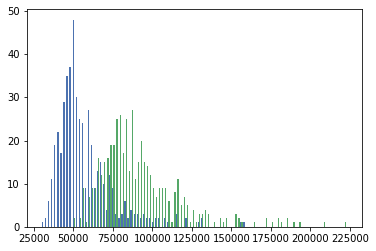

In [64]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

plt.hist([df['min'], df['max']], 100, label=['min', 'max'])

In [61]:
hist_x = [ 30000,  33860,  37720,  41580,  45440,  49300,  53160,
         57020,  60880,  64740,  68600,  72460,  76320,  80180,
         84040,  87900,  91760,  95620,  99480, 103340, 107200,
        111060, 114920, 118780, 122640, 126500, 130360, 134220,
        138080, 141940, 145800, 149660, 153520, 157380, 161240,
        165100, 168960, 172820, 176680, 180540, 184400, 188260,
        192120, 195980, 199840, 203700, 207560, 211420, 215280,
        219140, 223000]

hist_min_y = [ 3, 17, 41, 46, 72, 78, 49, 36, 28, 28, 14, 21,  5,
          9,  6,  6,  5,  4,  3,  2,  3,  0,  3,  2,  0,  1,
          2,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]

hist_max_y = [ 0,  0,  0,  0,  0,  2, 11,  8, 18, 28, 31, 38, 51,
         42, 40, 26, 35, 26, 16, 18, 15,  9, 16, 12,  5,  4,
          7,  3,  1,  3,  2,  3,  3,  0,  1,  0,  2,  1,  2,
          1,  2,  1,  1,  0,  0,  0,  1,  0,  0,  1]

In [65]:
with open('/Users/jz/token/mapbox.txt', 'r') as file:
    mapbox_token = file.read().replace('\n', '')

In [76]:
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

mapbox_access_token = mapbox_token

fig = go.Figure(go.Scattermapbox(
        lat=df['lat'],
        lon=df['lng'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=df['company'],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.7484,
            lon=-73.9857
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()
plot(fig, filename = 'filename.html', auto_open=False)

'filename.html'